# Vente et popularité des jeux videos au cours des années

<a href="https://www.kaggle.com/yassinehamdaoui1/cardiovascular-disease?select=cardiovascular.txt">Dataset provenant de Kaggle  : Video games sales</a>

### librairies

In [2]:
import pandas as pds
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sea
import math
import scipy

### Import du dataset

In [3]:
data = pds.read_csv("db/Video_Games_data.csv")

### Affichage du dataset

In [4]:
data.head(100)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58,NaN,NaN,NaN,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN,NaN,NaN


### dimension du dataset


In [5]:
data.shape

(16719, 16)

Le dataset est composé de 16719 jeux disposant de 16 variables.<br/>
Les variables sont :<br/>
- ```Name``` : Nom du jeu, catégorielle
- ```Platform``` : La plateforme de sortie du jeu, catégorielle
- ```Year_of_Release``` : l'année de sortie, numérique
- ```Genre``` : le genre du jeu,catégorielle
- ```Publisher``` : L'édieur,catégorielle
- ```NA_Sales``` : Vente en amérique du nord ( en million ), numérique
- ```EU_Sales``` : vente en europe ( en million ), numérique
- ```JP_Sales``` : vente au japon ( en million ), numérique
- ```Other_Sales``` : vente ailleur ( en million ), numérique
- ```Global_Sales``` : ventes globales ( en million ), catégorielle
- ```Critic_Score``` :Note des critiques (en pourcentage ), numérique
- ```User_Score``` : Note des joueurs ( en pourcentage ), numérique
- ```User_Count``` : Nombre de notes utilisateur ( en millier ), variable catégorielle
- ```Developer``` : Développeur, catégorielle
- ```Rating``` : rang, catégorielle


In [86]:
data=data.drop(['User_Score'],axis=1)

KeyError: "['User_Score'] not found in axis"

Les variables numériques sont extraites afin de pouvoir effectuer des analyses descriptives.

In [68]:
data.head()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,1.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0
1,1985.0,6.0,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,2008.0,5.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,1.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0
4,1996.0,2.0,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


In [87]:
data.tail()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
16714,2016.0,0.0,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN
16715,2006.0,1.0,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN
16716,2016.0,4.0,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN
16717,2003.0,6.0,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN
16718,2016.0,7.0,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN


In [88]:
data.dtypes

Year_of_Release    float64
Genre              float64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Count         float64
dtype: object

In [89]:
data["Genre"].value_counts()

0.0     3308
1.0     2306
99.0    1721
2.0     1483
3.0     1296
4.0     1293
5.0     1226
6.0      878
7.0      858
8.0      837
9.0      673
10.0     569
Name: Genre, dtype: int64

In [90]:
clean_Genre = {"Genre": {"Action": 0, "Sports": 1, "Role-Playing": 2, "Shooter": 3, "Adventure": 4, "Racing": 5, 
                          "Platform": 6, "Simulation": 7, "Fighting": 8, "Strategy": 9, "Puzzle": 10, "Misc": 99}}

In [91]:
data = data.replace(clean_Genre)
data.head()

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [122]:
data.isna().sum()

Year_of_Release       0
Genre                 2
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Count         8987
dtype: int64

### Il y a manquantes dans le dataset. Cependant seul les lignes sans années de parution nous dérangent ici.

In [123]:
data.replace('', np.nan, inplace=True)

In [132]:
data.dropna(inplace=True)

In [133]:
data.describe()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000,6894.000000,6894.000000
mean,2007.482303,8.475631,0.390920,0.234517,0.063867,0.08200,0.771487,70.258486,28.842472,174.392370
std,4.236401,22.229966,0.963231,0.684214,0.286461,0.26862,1.954780,13.861082,19.194572,584.872155
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,1.000000,0.060000,0.020000,0.000000,0.01000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,3.000000,0.150000,0.060000,0.000000,0.02000,0.290000,72.000000,24.000000,27.000000
75%,2011.000000,6.000000,0.390000,0.210000,0.010000,0.07000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,99.000000,41.360000,28.960000,6.500000,10.57000,82.530000,98.000000,113.000000,10665.000000


Ce tableau présente les moyennes, ecarts-type, minimum, quartiles et maximum pour chaque variable numérique étudiée.

#### Distribution des variables d'intérêt

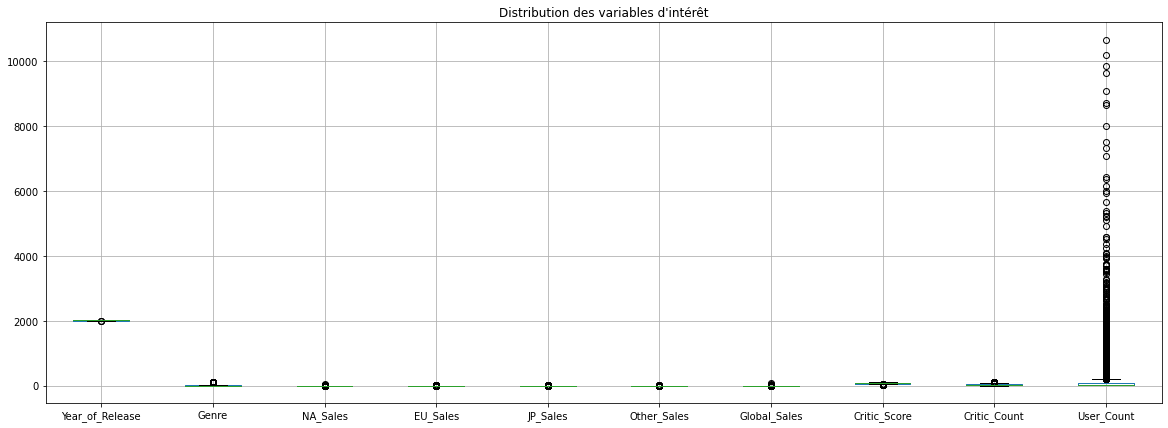

In [134]:
plt.figure(figsize=(20,7))
data.boxplot()
plt.title("Distribution des variables d'intérêt")
plt.show()

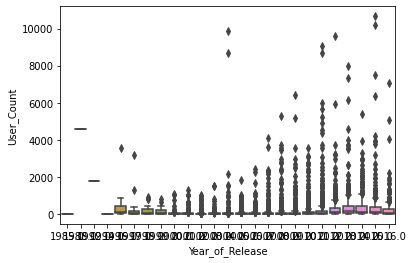

In [135]:
ax = sea.boxplot(x="Year_of_Release", y="User_Count", data=data)

#### Matrice des corrélations entre les variables d'intérêt

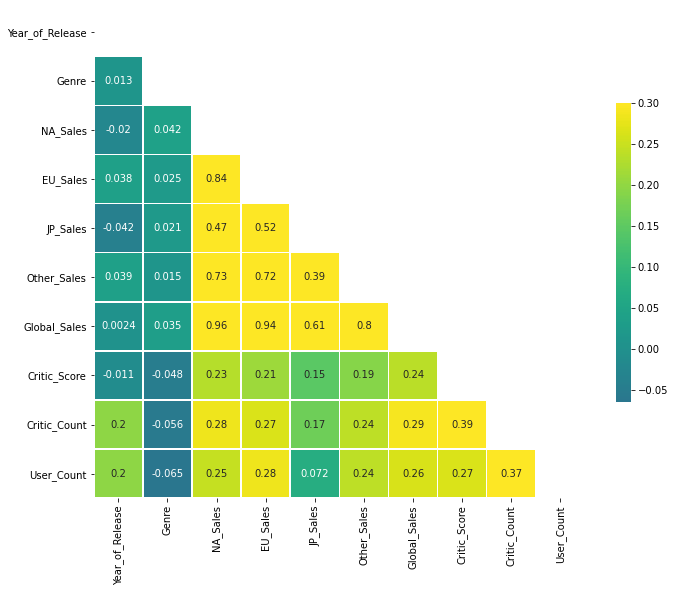

In [136]:
data_corr=pds.DataFrame(data)

corr=data_corr.corr()
corr_map=sea.color_palette("viridis",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(corr, mask=mask, cmap=corr_map, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [144]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [138]:
data.head()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.0,1.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
2,2008.0,5.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,2009.0,1.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
6,2006.0,6.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0
7,2006.0,99.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0


### Standardisation des données

Afin de pouvoir effectuer une ACP il faut standardiser les données.

In [146]:
data_std=StandardScaler().fit_transform(data)

data_std=pds.DataFrame(data)

data_std.index=data.index

On a **2 composantes principales**.

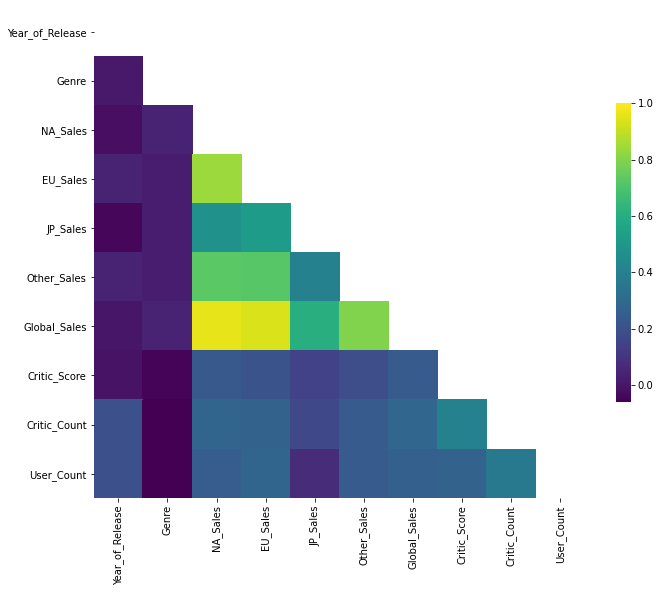

In [148]:
data_corr=pds.DataFrame(data)

corr=round(data_corr.corr(),ndigits=3)
corr_map=sea.color_palette("viridis",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(round(corr,ndigits=2),mask=mask, cmap=corr_map, vmax=1,
            square=True, cbar_kws={"shrink": .5})
plt.show()

## Analyse PCA

In [107]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

On récupère les colonnes ```Genre```et ```Global_Sales```pour l'analyse.

In [185]:
data_PCA=pds.concat([data,data.Global_Sales,data.Genre],axis=1)
data_PCA.head()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Genre
0,2006.0,1.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0,82.53,1.0
2,2008.0,5.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0,35.52,5.0
3,2009.0,1.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0,32.77,1.0
6,2006.0,6.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0,29.80,6.0
7,2006.0,99.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0,28.92,99.0


Création des tables d'entrainement et de test

In [184]:
X=data.iloc[:,:-1]
y = data_PCA['Genre']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42) 
print(X_train.shape,X_test.shape)

(4825, 9) (2069, 9)


In [186]:
pca=PCA(n_components=5)

principalComponents = pca.fit_transform(X_train)

factors_Df = pds.DataFrame(data = principalComponents, columns =['PC1','PC2','PC3','PC4','PC5'])

factors_Df.index=X_train.index

In [187]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5
11740,-1.343407,-11.303248,-9.986033,-1.583014,-0.420227
11259,0.895383,-18.068603,-6.776937,0.383917,-0.196147
14385,0.765402,-10.776674,4.080491,2.341508,-0.511602
9492,-4.873484,-10.176913,-10.145561,0.476747,-0.492968
7520,-4.288540,-8.436149,-1.919569,4.075687,-0.545939


In [188]:
print('Ratio des valeurs propre: \n',pca.explained_variance_ratio_,)
print('Somme cumulée du ratio des valeurs propres: \n',pca.explained_variance_ratio_.cumsum())
print('Somme du ratio des valeurs propre: \n',pca.explained_variance_ratio_.sum())

Ratio des valeurs propre: 
 [0.47532726 0.37404637 0.1297403  0.01571276 0.00498106]
Somme cumulée du ratio des valeurs propres: 
 [0.47532726 0.84937363 0.97911394 0.9948267  0.99980776]
Somme du ratio des valeurs propre: 
 0.9998077582379161


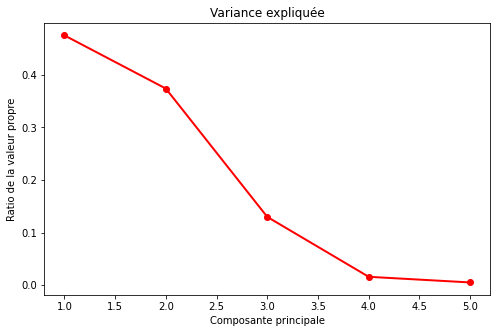

In [189]:
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(pca.explained_variance_ratio_.shape[0]) + 1
plt.plot(sing_vals, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Variance expliquée')
plt.xlabel('Composante principale')
plt.ylabel('Ratio de la valeur propre')
plt.show()

### Projection des observations pour l'entrainement

<Figure size 432x288 with 0 Axes>

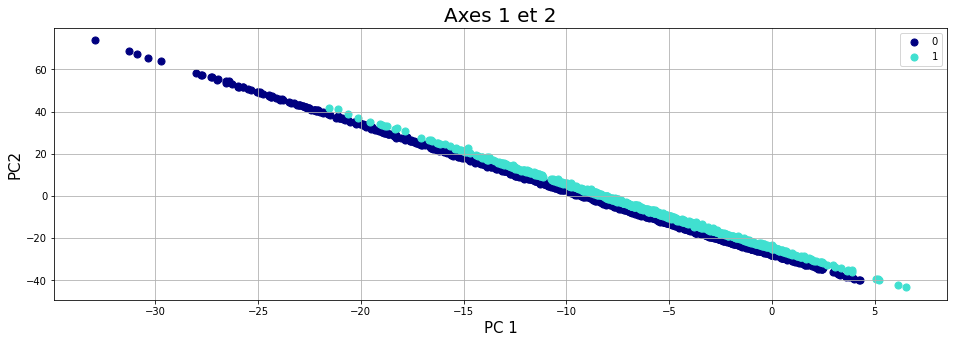

In [193]:
names=pds.DataFrame(data=data.Genre,columns=['Genre'])

final_factors_Df = pds.concat([factors_Df, data['Genre']], axis = 1)
id_factors=pds.concat([names,final_factors_Df],axis=1)
id_factors=id_factors.sort_values(by=['PC1'])
final_factors_Df=final_factors_Df.sort_values(by=['PC1'])


plt.figure()
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
colors = ['navy', 'turquoise']
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Axes 1 et 2', fontsize = 20)
targets = [0,1]

for target, color in zip(targets,colors):
    indicesToKeep = final_factors_Df['Genre'] == target
    ax.scatter(final_factors_Df.loc[indicesToKeep, 'PC1'], final_factors_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

### Echantillon Test

In [182]:
X_supp=X_test ; y_supp=y_test
coordSupp=pca.transform(X_supp)

ValueError: Cannot index with multidimensional key

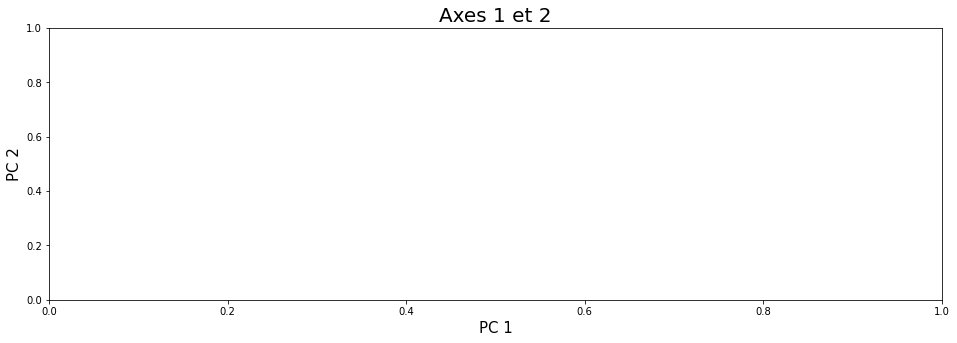

In [183]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Axes 1 et 2', fontsize = 20)
df2=pds.DataFrame(data=coordSupp,index=X_supp.index,columns=final_factors_Df.columns[0:5])
df0=data_PCA.loc[X_supp.index]['Global_Sales']
gdf=pds.concat([df2,df0],axis=1)
targets = [0,1]
colors = ['yellow','red']
for target, color in zip(targets,colors):
    indicesToKeep = gdf['Global_Sales'] == target
    ax.scatter(gdf.loc[indicesToKeep, 'PC1'], gdf.loc[indicesToKeep, 'PC2'],c= color, s = 50,marker='o')
    ax.legend(targets)

ax.grid()
plt.show()